<a href="https://colab.research.google.com/github/TravisJRCain/DS-Unit-1-Sprint-2-Statistics/blob/master/DS-Unit-1-Sprint-2-Statistics/module3/Travis_Cain_LS_DS14_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [1]:
# TODO - code!

# def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
# What is the probability that a person is drunk after one positive breathalyzer test?

# True Positive Rate
true_positive_rate = 1

# Prior
prob_drunk_prior = 1/1000

# False Positive Rate
false_positive_rate = 8/100

# Complement Prior
drunk_nonuser = 1-prob_drunk_prior

numerator = (true_positive_rate*prob_drunk_prior)
denominator = (true_positive_rate*prob_drunk_prior) + (false_positive_rate*drunk_nonuser)

prob_drunk_given_positive = numerator/denominator

prob_drunk_given_positive

0.012357884330202669

In [2]:
# To see results a second time, change prior
# What is the probability that a person is drunk after two positive breathalyzer tests?

# True Positive Rate
true_positive_rate = 1

# Prior
prob_drunk_prior = 0.012357884330202669

# False Positive Rate
false_positive_rate = 8/100

# Complement Prior
drunk_nonuser = 1-prob_drunk_prior

numerator = (true_positive_rate*prob_drunk_prior)
denominator = (true_positive_rate*prob_drunk_prior) + (false_positive_rate*drunk_nonuser)

prob_drunk_given_positive2 = numerator/denominator

prob_drunk_given_positive2

0.13525210993291495

In [0]:
# How many positive breathalyzer tests are needed in order to have a probability
# that's greater than 95% that a person is drunk beyond the legal limit?

drunk_prob = []
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  if prob_drunk_prior >= 0.95:
    return print(str('Drunk'))
  else:
    numerator = (true_positive_rate*prob_drunk_prior)
    denom = (prob_drunk_prior * true_positive_rate) + ((1 - prob_drunk_prior) * false_positive_rate)
    bayesian = numerator / denom
    drunk_prob.append(bayesian)
  return prob_drunk_given_positive(bayesian, .08, 1)

prob_drunk_given_positive(1/1000, .08, 1)
print(lst)


In [21]:
# 2nd Objective

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-19 22:04:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-03-19 22:04:08 (498 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [25]:
import pandas as pd

names = ['party','handicapped-infants','water-project',
         'budget','physician-fee-freeze', 'el-salvador-aid',
         'religious-groups','anti-satellite-ban',
         'aid-to-contras','mx-missile','immigration',
         'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

df = pd.read_csv('house-votes-84.data', names = names)
df = df.replace({'y':1, 'n':0, '?': np.NaN})

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
# Confidence Interval

def confidence_interval(data, confidence = .95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof = 1)
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
freq_CI = confidence_interval(dem['budget'].dropna())

In [39]:
freq_CI

(0.8884615384615384, 0.8499435153340716, 0.9269795615890052)

In [40]:
mean_CI, _, _, = stats.bayes_mvs(dem['budget'].dropna(), alpha = .95)
bayes_CI = list(mean_CI)
bayes_CI[1:2] = 0.8499435153340716, 0.9269795615890052
bayes_CI = tuple(bayes_CI)
bayes_CI

(0.8884615384615384, 0.8499435153340716, 0.9269795615890052)

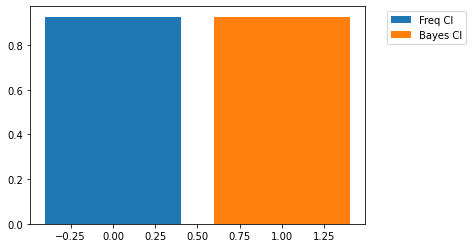

In [49]:
import matplotlib.pyplot as plt

labels = ['Freq CI', 'Bayes CI']

fig, ax = plt.subplots()
ax.bar(0, freq_CI)
ax.bar(1, bayes_CI)
ax.legend(labels, bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.show()

In [0]:
# In your own words, summarize the difference between Bayesian and Frequentist statistics

# Bayesian statistics look at probability and how the probability expresses the
# degree of belief in a potential outcome.

# Frequentist statistics look at sample data and emphasize the trends, 
# frequencey and proportions of the data. They base their assumptions on what has happened.

In [0]:
?stats.bayes_mvs

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!